In [2]:
import pandas as pd
import numpy as np
from sklearn import metrics, model_selection, ensemble, neighbors, svm, tree, neural_network, base
import matplotlib.pyplot as plt

import importlib
import datetime
import mlTest
import preprocessing
importlib.reload(mlTest)
importlib.reload(preprocessing)

<module 'preprocessing' from 'C:\\Users\\Chunlok Lo\\Documents\\cs4641\\supervised_learning\\implementation\\preprocessing.py'>

In [3]:
df = pd.read_csv("data/forest/covtype.csv")
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
5,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
6,2606,45,7,270,5,633,222,225,138,6256,...,0,0,0,0,0,0,0,0,0,5
7,2605,49,4,234,7,573,222,230,144,6228,...,0,0,0,0,0,0,0,0,0,5
8,2617,45,9,240,56,666,223,221,133,6244,...,0,0,0,0,0,0,0,0,0,5
9,2612,59,10,247,11,636,228,219,124,6230,...,0,0,0,0,0,0,0,0,0,5


In [4]:
df['Cover_Type'].value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

In [5]:
#getting train_set
df1 = df[df['Cover_Type'] == 1].sample(1620)
df2 = df[df['Cover_Type'] == 2].sample(1620)
df3 = df[df['Cover_Type'] == 3].sample(1620)
df4 = df[df['Cover_Type'] == 4].sample(1620)
df5 = df[df['Cover_Type'] == 5].sample(1620)
df6 = df[df['Cover_Type'] == 6].sample(1620)
df7 = df[df['Cover_Type'] == 7].sample(1620)
df_train = pd.concat([df1, df2, df3, df4, df5, df6, df7], axis=0)
df_train['Cover_Type'].value_counts()

7    1620
6    1620
5    1620
4    1620
3    1620
2    1620
1    1620
Name: Cover_Type, dtype: int64

In [6]:
df.shape

(581012, 55)

In [7]:
df = df.drop(df_train.index)

In [8]:
df1 = df[df['Cover_Type'] == 1].sample(540)
df2 = df[df['Cover_Type'] == 2].sample(540)
df3 = df[df['Cover_Type'] == 3].sample(540)
df4 = df[df['Cover_Type'] == 4].sample(540)
df5 = df[df['Cover_Type'] == 5].sample(540)
df6 = df[df['Cover_Type'] == 6].sample(540)
df7 = df[df['Cover_Type'] == 7].sample(540)
df_val = pd.concat([df1, df2, df3, df4, df5, df6, df7], axis=0)
df_val['Cover_Type'].value_counts()

7    540
5    540
3    540
1    540
6    540
4    540
2    540
Name: Cover_Type, dtype: int64

In [9]:
df = df.drop(df_val.index)

In [10]:
print(df.shape)
df_train = df_train.sample(frac=1)
df_val = df_val.sample(frac=1)
df = df.sample(frac=1)

(565892, 55)


In [11]:
X_train, y_train = preprocessing.XySplit(df_train, 'Cover_Type')
X_val, y_val = preprocessing.XySplit(df_val, 'Cover_Type')
X_train_val = pd.concat([X_train, X_val], axis=0)
y_train_val = pd.concat([y_train, y_val], axis=0)
X_test, y_test = preprocessing.XySplit(df, 'Cover_Type')

In [11]:
X_train_val.shape

(15120, 54)

In [14]:
clf = svm.SVC(random_state=0, gamma='scale', max_iter=1000)
clf.fit(X_val, y_val)
#mlTest.show_confusion_matrix(clf, X_test, y_test, classes=[0, 1])

C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=1000, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

[[124391  69100    190      0   4314    210  11475]
 [ 56241 187899   9078     64  19434   6516   1909]
 [   115   2546  23341   2210    428   4954      0]
 [     0      2     26    535      0     24      0]
 [    59    585    109      0   6481     99      0]
 [    71    562   2090    747    232  11505      0]
 [  1699   1151      5      0     12      0  15483]]


(array([[124391,  69100,    190,      0,   4314,    210,  11475],
        [ 56241, 187899,   9078,     64,  19434,   6516,   1909],
        [   115,   2546,  23341,   2210,    428,   4954,      0],
        [     0,      2,     26,    535,      0,     24,      0],
        [    59,    585,    109,      0,   6481,     99,      0],
        [    71,    562,   2090,    747,    232,  11505,      0],
        [  1699,   1151,      5,      0,     12,      0,  15483]],
       dtype=int64), 0.6531900079873898)

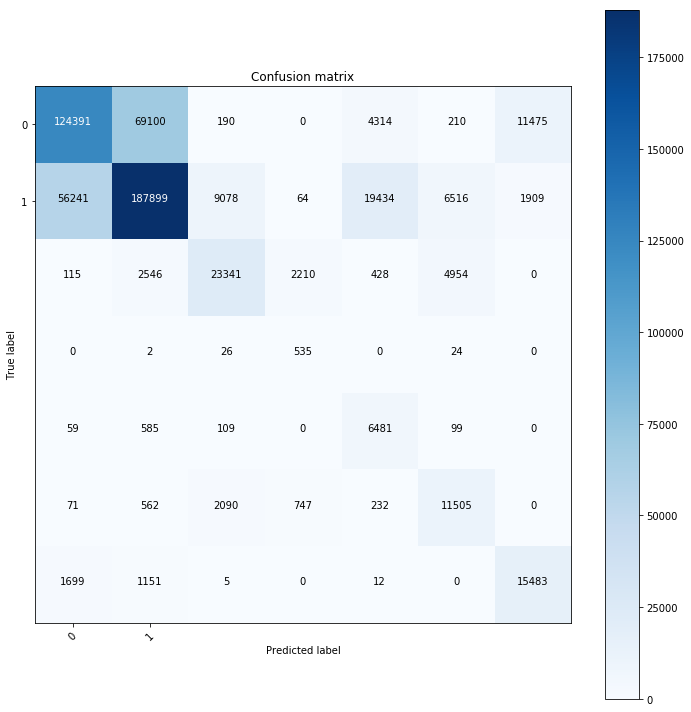

In [15]:
mlTest.show_confusion_matrix(clf, X_test, y_test, classes=[0, 1])

In [41]:
X_full, y_full = preprocessing.XySplit(df, 'Cover_Type')
X_train, X_val, X_test_full, X_train_val, y_train_full, y_val, y_test_full, y_train_val = mlTest.train_val_test_split(X_full, y_full, train_size=.8, val_size=.1)

C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [18]:
X_test = X_val
y_test = y_val

In [19]:
y.describe()

count    581012.000000
mean          2.051471
std           1.396504
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           7.000000
Name: Cover_Type, dtype: float64

Initial Performance Testing:

[[134870  49606    416      0   5559   1020  18209]
 [ 62031 170793   6740    186  30174   8324   2893]
 [    20    742  24975   1548    721   5578     10]
 [     0      0     31    540      0     16      0]
 [   171    582    113      0   6384     83      0]
 [    58    374   2387    559    214  11615      0]
 [  1294    198      7      0      5      0  16846]]
0.6468071646179836


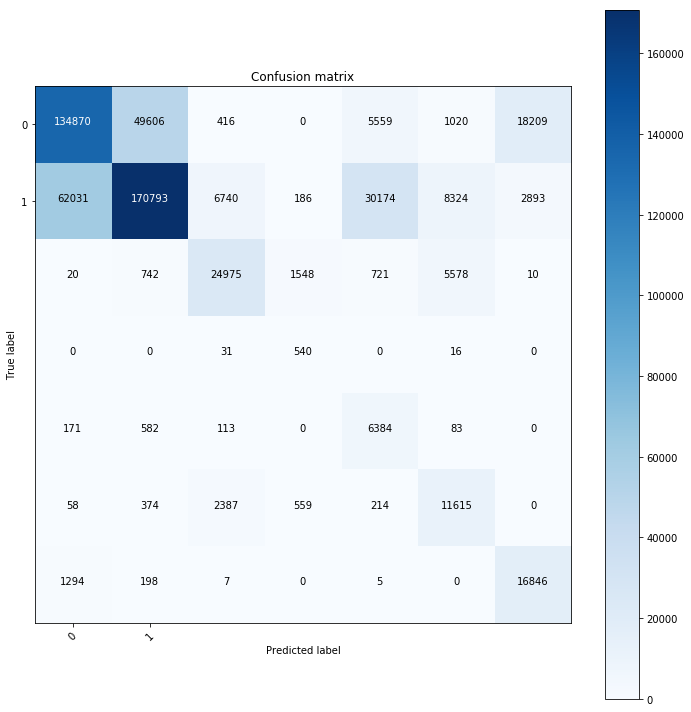

In [13]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
cnf_matrix, accuracy = mlTest.show_confusion_matrix(clf, X_test, y_test, classes=[0, 1])
print(accuracy)

[[263   6   1   0   8   2  39]
 [191  28  18   0  32  38   7]
 [  0   5 103   0   6 163   0]
 [  0   0  22   0   0 223   0]
 [ 53  47  14   0 141  28   0]
 [  0   6 179   0  10 133   0]
 [241   0   0   0   0   0  68]]


(array([[263,   6,   1,   0,   8,   2,  39],
        [191,  28,  18,   0,  32,  38,   7],
        [  0,   5, 103,   0,   6, 163,   0],
        [  0,   0,  22,   0,   0, 223,   0],
        [ 53,  47,  14,   0, 141,  28,   0],
        [  0,   6, 179,   0,  10, 133,   0],
        [241,   0,   0,   0,   0,   0,  68]], dtype=int64), 0.3546987951807229)

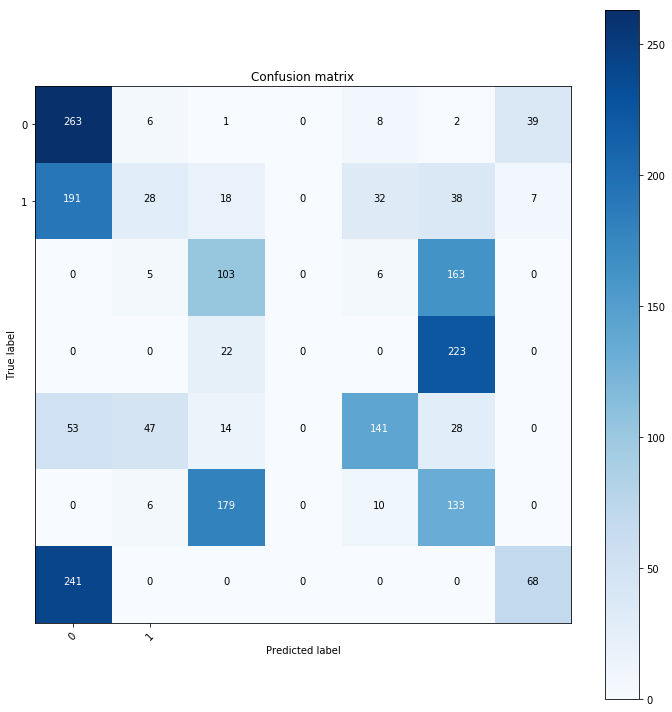

In [11]:
clf = ensemble.AdaBoostClassifier(random_state=0, n_estimators=200)
clf.fit(X_train_val, y_train_val)
mlTest.show_confusion_matrix(clf, X_test, y_test, classes=[0, 1])

[[173 178  17   1   0   2  17]
 [ 68 275 120   2   1   4   1]
 [  0   1  54   0   0   0   1]
 [  0   0   6   0   0   0   0]
 [  1  11  10   0   0   0   0]
 [  0   3  24   0   0   0   0]
 [ 24   2   0   0   0   0   4]]


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


(array([[173, 178,  17,   1,   0,   2,  17],
        [ 68, 275, 120,   2,   1,   4,   1],
        [  0,   1,  54,   0,   0,   0,   1],
        [  0,   0,   6,   0,   0,   0,   0],
        [  1,  11,  10,   0,   0,   0,   0],
        [  0,   3,  24,   0,   0,   0,   0],
        [ 24,   2,   0,   0,   0,   0,   4]], dtype=int64), 0.506)

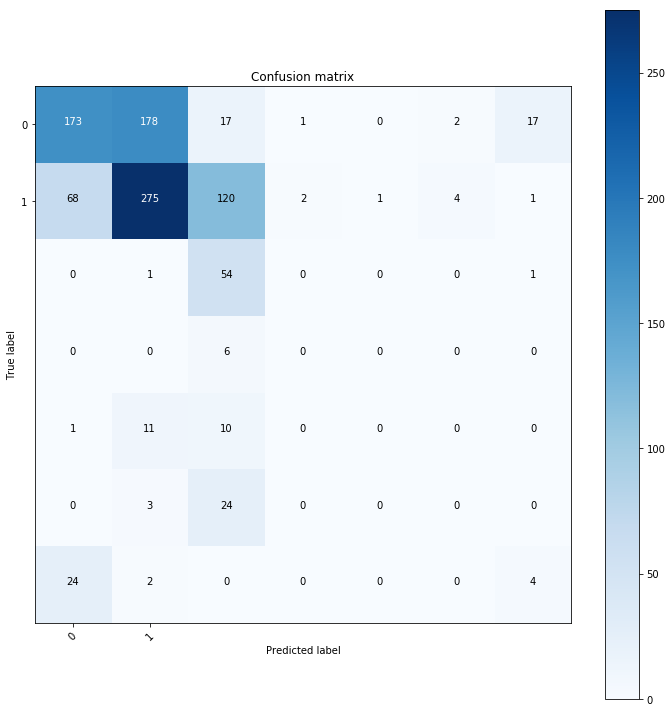

In [20]:
clf = svm.LinearSVC(random_state=0)
clf.fit(X_train_val, y_train_val)
mlTest.show_confusion_matrix(clf, X_test, y_test, classes=[0, 1])

C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[1263    1]
 [ 619   19]]


(array([[1263,    1],
        [ 619,   19]], dtype=int64), 0.6740273396424816)

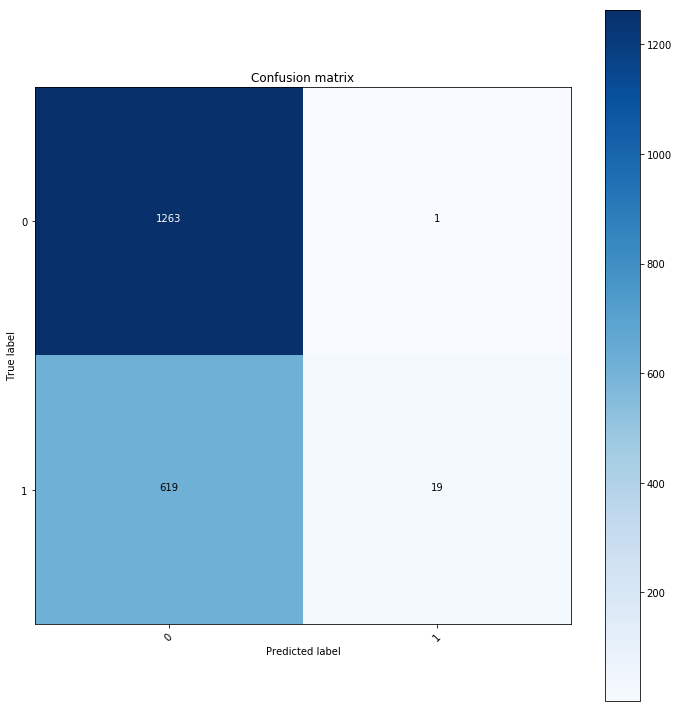

In [27]:
clf = svm.SVC(random_state=0)
clf.fit(X_train_val, y_train_val)
mlTest.show_confusion_matrix(clf, X_test, y_test, classes=[0, 1])

In [56]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU, Activation
import numpy as np

model = Sequential()
model.add(Dense(10,input_shape=(10,)))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('relu'))
model.add(Dense(1))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(X_train.values, y_train.values, epochs=200, validation_data=(X_val.values, y_val.values))

Train on 15216 samples, validate on 1902 samples
Epoch 1/200
15216/15216 [==============================] - 3s 218us/step - loss: 5.7148 - acc: 0.0387 - val_loss: 5.5507 - val_acc: 0.0358
Epoch 2/200
15216/15216 [==============================] - 3s 165us/step - loss: 5.7148 - acc: 0.0387 - val_loss: 5.5507 - val_acc: 0.0358
Epoch 3/200
 6176/15216 [===========>..................] - ETA: 1s - loss: 5.7468 - acc: 0.0368

KeyboardInterrupt: 

[[1132  132]
 [ 197  441]]


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


(array([[1132,  132],
        [ 197,  441]], dtype=int64), 0.8270241850683491)

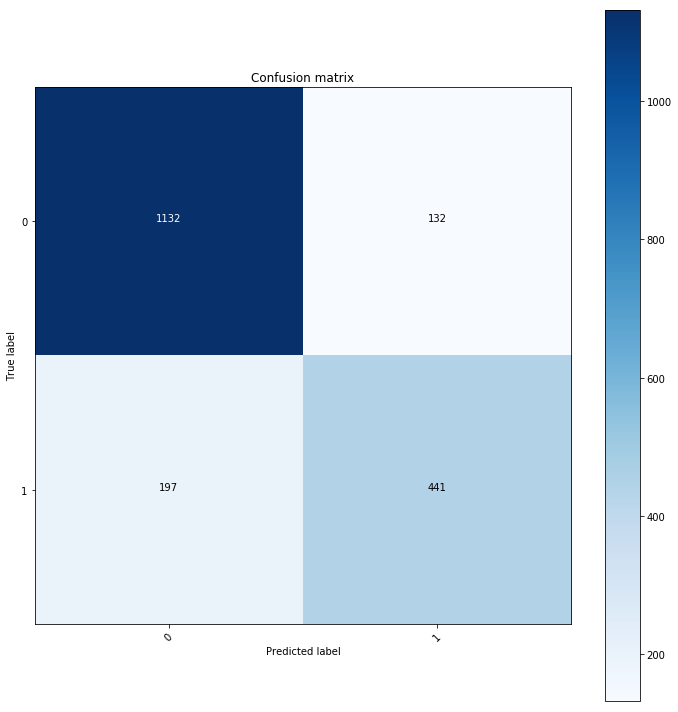

In [30]:
clf = neural_network.MLPClassifier(hidden_layer_sizes=(5, 2), random_state=0)
clf.fit(X_train_val, y_train_val)
mlTest.show_confusion_matrix(clf, X_test, y_test, classes=[0, 1])

Algorithm Testing:

Neural Network Tuning: Parameters: Network architecture. Batch sizes Need Training graph

In [15]:
from keras.utils import to_categorical
# NNX_train = to_categorical(X_train)
NNy_train = to_categorical(y_train)
# NNX_val = to_categorical(X_val)
NNy_val = to_categorical(y_val)

In [ ]:
clf = neural_network.MLPClassifier(hidden_layer_sizes=(10, 4), random_state=0)
clf.fit(X_train_val, y_train_val)
mlTest.show_confusion_matrix(clf, X_test, y_test, classes=[0, 1])

In [16]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU, Activation
import numpy as np
mc = keras.callbacks.ModelCheckpoint('COVTYPENNweights2{epoch:08d}.h5', 
                                     save_weights_only=True, period=5)
model = Sequential()
model.add(Dense(32,kernel_initializer='lecun_uniform',input_shape=(54,)))
model.add(Activation('relu'))
model.add(Dense(24, kernel_initializer='lecun_uniform'))
model.add(Activation('relu'))
model.add(Dense(16, kernel_initializer='lecun_uniform'))
model.add(Activation('relu'))
model.add(Dense(8, kernel_initializer='lecun_uniform'))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#hist = model.fit(X_train.values, NNy_train, batch_size=32, epochs=300, validation_data=(X_val.values, NNy_val), callbacks=[mc])

In [17]:
model.load_weights("COVTYPENNweights00000300.h5")

In [63]:
mlTest.saveObj(hist.history, 'COVER-NN', descriptors='300-history')

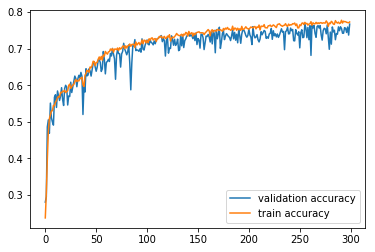

In [62]:
plt.plot(range(0, 300), hist.history['val_acc'], label='validation accuracy')
plt.plot(range(0, 300), hist.history['acc'], label='train accuracy')
plt.legend()
plt.show()

In [18]:
mc = keras.callbacks.ModelCheckpoint('COVTYPENNweights-Cont2{epoch:08d}.h5', 
                                     save_weights_only=True, period=5)
hist2 = model.fit(X_train.values, NNy_train, batch_size=32, epochs=300, validation_data=(X_val.values, NNy_val), callbacks=[mc])

Train on 11340 samples, validate on 3780 samples
Epoch 1/300
11340/11340 [==============================] - 3s 222us/step - loss: 0.6071 - acc: 0.7574 - val_loss: 0.5974 - val_acc: 0.7640
Epoch 2/300
11340/11340 [==============================] - 2s 171us/step - loss: 0.5957 - acc: 0.7608 - val_loss: 0.5770 - val_acc: 0.7646
Epoch 3/300
11340/11340 [==============================] - 2s 177us/step - loss: 0.6088 - acc: 0.7553 - val_loss: 0.5766 - val_acc: 0.7672
Epoch 4/300
11340/11340 [==============================] - 2s 172us/step - loss: 0.5970 - acc: 0.7581 - val_loss: 0.6264 - val_acc: 0.7392
Epoch 5/300
11340/11340 [==============================] - 2s 173us/step - loss: 0.5794 - acc: 0.7683 - val_loss: 0.6181 - val_acc: 0.7529
Epoch 6/300
11340/11340 [==============================] - 2s 178us/step - loss: 0.5925 - acc: 0.7602 - val_loss: 0.5635 - val_acc: 0.7733
Epoch 7/300
11340/11340 [==============================] - 2s 169us/step - loss: 0.5904 - acc: 0.7634 - val_loss: 0.5

11340/11340 [==============================] - 2s 213us/step - loss: 0.5608 - acc: 0.7727 - val_loss: 0.5732 - val_acc: 0.7680
Epoch 60/300
11340/11340 [==============================] - 2s 184us/step - loss: 0.5527 - acc: 0.7741 - val_loss: 0.5895 - val_acc: 0.7709
Epoch 61/300
11340/11340 [==============================] - 2s 211us/step - loss: 0.5604 - acc: 0.7732 - val_loss: 0.5532 - val_acc: 0.7865
Epoch 62/300
11340/11340 [==============================] - 2s 192us/step - loss: 0.5570 - acc: 0.7800 - val_loss: 0.6324 - val_acc: 0.7606
Epoch 63/300
11340/11340 [==============================] - 2s 214us/step - loss: 0.5701 - acc: 0.7724 - val_loss: 0.6579 - val_acc: 0.7418
Epoch 64/300
11340/11340 [==============================] - 2s 213us/step - loss: 0.5554 - acc: 0.7760 - val_loss: 0.5413 - val_acc: 0.7833
Epoch 65/300
11340/11340 [==============================] - 2s 188us/step - loss: 0.5663 - acc: 0.7739 - val_loss: 0.5550 - val_acc: 0.7886
Epoch 66/300
11340/11340 [=======

11340/11340 [==============================] - 2s 178us/step - loss: 0.5459 - acc: 0.7776 - val_loss: 0.5587 - val_acc: 0.7688
Epoch 118/300
11340/11340 [==============================] - 2s 180us/step - loss: 0.5441 - acc: 0.7826 - val_loss: 0.5726 - val_acc: 0.7738
Epoch 119/300
11340/11340 [==============================] - 2s 176us/step - loss: 0.5428 - acc: 0.7815 - val_loss: 0.5611 - val_acc: 0.7733
Epoch 120/300
11340/11340 [==============================] - 2s 180us/step - loss: 0.5632 - acc: 0.7705 - val_loss: 0.5594 - val_acc: 0.7780
Epoch 121/300
11340/11340 [==============================] - 2s 205us/step - loss: 0.5437 - acc: 0.7824 - val_loss: 0.5431 - val_acc: 0.7839
Epoch 122/300
11340/11340 [==============================] - 2s 188us/step - loss: 0.5381 - acc: 0.7806 - val_loss: 0.5834 - val_acc: 0.7690
Epoch 123/300
11340/11340 [==============================] - 2s 208us/step - loss: 0.5516 - acc: 0.7799 - val_loss: 0.5449 - val_acc: 0.7929
Epoch 124/300
11340/11340 [

11340/11340 [==============================] - 2s 192us/step - loss: 0.5352 - acc: 0.7855 - val_loss: 0.5958 - val_acc: 0.7696
Epoch 176/300
11340/11340 [==============================] - 2s 198us/step - loss: 0.5377 - acc: 0.7897 - val_loss: 0.5898 - val_acc: 0.7712
Epoch 177/300
11340/11340 [==============================] - 2s 203us/step - loss: 0.5298 - acc: 0.7855 - val_loss: 0.5602 - val_acc: 0.7775
Epoch 178/300
11340/11340 [==============================] - 3s 242us/step - loss: 0.5323 - acc: 0.7869 - val_loss: 0.5988 - val_acc: 0.7656
Epoch 179/300
11340/11340 [==============================] - 3s 230us/step - loss: 0.5297 - acc: 0.7899 - val_loss: 0.5759 - val_acc: 0.7841
Epoch 180/300
11340/11340 [==============================] - 2s 201us/step - loss: 0.5339 - acc: 0.7850 - val_loss: 0.5795 - val_acc: 0.7817
Epoch 181/300
11340/11340 [==============================] - 2s 203us/step - loss: 0.5334 - acc: 0.7868 - val_loss: 0.5982 - val_acc: 0.7738
Epoch 182/300
11340/11340 [

11340/11340 [==============================] - 2s 188us/step - loss: 0.5329 - acc: 0.7845 - val_loss: 0.5678 - val_acc: 0.7794
Epoch 234/300
11340/11340 [==============================] - 2s 184us/step - loss: 0.5394 - acc: 0.7821 - val_loss: 0.5565 - val_acc: 0.7765
Epoch 235/300
11340/11340 [==============================] - 2s 194us/step - loss: 0.5227 - acc: 0.7899 - val_loss: 0.6234 - val_acc: 0.7569
Epoch 236/300
11340/11340 [==============================] - 2s 200us/step - loss: 0.5343 - acc: 0.7884 - val_loss: 0.6548 - val_acc: 0.7415
Epoch 237/300
11340/11340 [==============================] - 2s 191us/step - loss: 0.5321 - acc: 0.7854 - val_loss: 0.5826 - val_acc: 0.7794
Epoch 238/300
11340/11340 [==============================] - 2s 187us/step - loss: 0.5175 - acc: 0.7884 - val_loss: 0.5444 - val_acc: 0.7828
Epoch 239/300
11340/11340 [==============================] - 2s 183us/step - loss: 0.5280 - acc: 0.7878 - val_loss: 0.5839 - val_acc: 0.7802
Epoch 240/300
11340/11340 [

11340/11340 [==============================] - 2s 210us/step - loss: 0.5110 - acc: 0.7973 - val_loss: 0.5514 - val_acc: 0.7897
Epoch 292/300
11340/11340 [==============================] - 2s 197us/step - loss: 0.5095 - acc: 0.7972 - val_loss: 0.6447 - val_acc: 0.7452
Epoch 293/300
11340/11340 [==============================] - 2s 196us/step - loss: 0.5236 - acc: 0.7922 - val_loss: 0.5652 - val_acc: 0.7743
Epoch 294/300
11340/11340 [==============================] - 2s 185us/step - loss: 0.5138 - acc: 0.7932 - val_loss: 0.5552 - val_acc: 0.7788
Epoch 295/300
11340/11340 [==============================] - 2s 211us/step - loss: 0.5101 - acc: 0.7950 - val_loss: 0.5567 - val_acc: 0.7929
Epoch 296/300
11340/11340 [==============================] - 2s 192us/step - loss: 0.5158 - acc: 0.7951 - val_loss: 0.6022 - val_acc: 0.7720
Epoch 297/300
11340/11340 [==============================] - 2s 187us/step - loss: 0.5258 - acc: 0.7892 - val_loss: 0.5710 - val_acc: 0.7847
Epoch 298/300
11340/11340 [

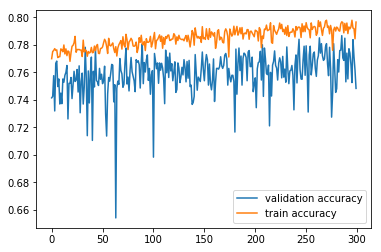

In [65]:
plt.plot(range(0, 300), hist2.history['val_acc'], label='validation accuracy')
plt.plot(range(0, 300), hist2.history['acc'], label='train accuracy')
plt.legend()
plt.show()

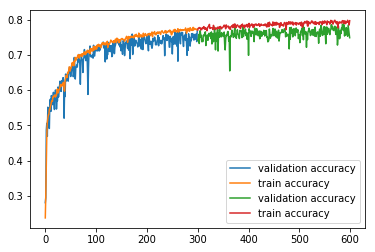

In [66]:
plt.plot(range(0, 300), hist.history['val_acc'], label='validation accuracy')
plt.plot(range(0, 300), hist.history['acc'], label='train accuracy')
plt.plot(range(300, 600), hist2.history['val_acc'], label='validation accuracy')
plt.plot(range(300, 600), hist2.history['acc'], label='train accuracy')
plt.legend()
plt.show()

In [1]:
mlTest.saveObj(hist2.history, 'COVER-NN', descriptors='600-history')

NameError: name 'mlTest' is not defined

In [75]:
NNy_test = to_categorical(y_test)
NNy_ = model.predict(X_test.values)

In [76]:
NNy_

array([[1.3845662e-28, 8.4338301e-01, 1.5293606e-01, ..., 2.2398012e-03,
        3.2589069e-05, 1.4085488e-03],
       [2.7792259e-33, 4.6273479e-01, 5.1943433e-01, ..., 1.7744003e-02,
        1.8800455e-06, 8.4754283e-05],
       [1.9996508e-32, 8.9638558e-04, 3.9238058e-02, ..., 1.3797597e-02,
        9.2774230e-01, 6.8085038e-11],
       ...,
       [2.7028766e-26, 8.4673452e-01, 6.6131771e-02, ..., 1.6778579e-03,
        5.8062932e-07, 8.5455269e-02],
       [1.1826883e-31, 6.9836903e-01, 2.7231407e-01, ..., 2.8703718e-02,
        5.7385181e-04, 3.9319719e-05],
       [0.0000000e+00, 2.0779346e-01, 7.9167658e-01, ..., 8.2697130e-05,
        4.4733565e-04, 3.1743344e-08]], dtype=float32)

In [81]:
y_ = np.argmax(NNy_, axis=1)

In [84]:
accuracy = metrics.accuracy_score(y_test, y_)
print(accuracy)

0.6271784465446784


In [85]:
m = metrics.precision_recall_fscore_support(y_test,y_)
m = np.concatenate(([['Spruce-Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']], m), axis=0)
m = np.array(m).transpose()
from tabulate import tabulate
headers=['Class', 'Precision', 'Recall', 'F1 Score', 'Support']
print(tabulate(m, tablefmt="latex", floatfmt=".3f", headers=headers))

\begin{tabular}{lrrrr}
\hline
 Class             &   Precision &   Recall &   F1 Score &    Support \\
\hline
 Spruce-Fir        &       0.655 &    0.795 &      0.718 & 210220.000 \\
 Lodgepole Pine    &       0.819 &    0.472 &      0.599 & 281681.000 \\
 Ponderosa Pine    &       0.777 &    0.642 &      0.703 &  34134.000 \\
 Cottonwood/Willow &       0.398 &    0.905 &      0.553 &   1127.000 \\
 Aspen             &       0.108 &    0.897 &      0.193 &   7873.000 \\
 Douglas-fir       &       0.368 &    0.831 &      0.510 &  15747.000 \\
 Krummholz         &       0.686 &    0.746 &      0.715 &  18890.000 \\
\hline
\end{tabular}


In [86]:
cnf_matrix = metrics.confusion_matrix(y_test, y_)

In [87]:
mlTest.saveNpArray(cnf_matrix, "COVER-NN", descriptors="cnf_matrix")

In [88]:
cnf_matrix

array([[167097,  28318,     31,      0,   8111,    863,   5800],
       [ 83335, 133041,   4396,     38,  47895,  12339,    637],
       [     0,    342,  21901,   1239,   1536,   9116,      0],
       [     0,      0,     66,   1020,      1,     40,      0],
       [    56,    511,    102,      0,   7062,    141,      1],
       [     7,    209,   1630,    264,    555,  13082,      0],
       [  4690,     41,     45,      0,     31,      0,  14083]],
      dtype=int64)

In [1]:
print("hIO")

hIO
